<a href="https://colab.research.google.com/github/emilia-uncc/IntroML/blob/main/Assignment6/Homework6_2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.optim as optim
import torch.nn as nn
from torch.autograd import Variable

from torchvision import datasets
from torchvision import transforms

import datetime

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/My Drive/DataSets/'
cifar10 = datasets.CIFAR10(data_path,train=True,download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)
#cifar10 = datasets.CIFAR10(data_path,train=True,download=True, transform=transforms.ToTensor())
#cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform = transforms.ToTensor())


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
len(cifar10)

50000

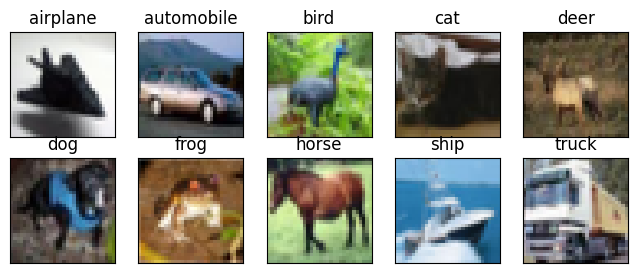

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [ ]:
#img_t, _ = cifar10[99]
#img_t.shape
#plt.imshow(img_t.permute(1,2,0))

In [ ]:
#imgs = torch.stack([img_t for img_t, _ in cifar10], dim=3)
#imgs.shape

In [ ]:
#imgs.view(3,-1).mean(dim=1)
#imgs.view(3,-1).std(dim=1)


In [ ]:
#transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))

In [ ]:
transformed_cifar10 = datasets.CIFAR10(data_path, train=True,download=False,
                                       transform = transforms.Compose([
                                          transforms.ToTensor(),
                                          transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))]))
transformed_cifar10_val = datasets.CIFAR10(data_path, train=False,download=False,
                                       transform = transforms.Compose([
                                          transforms.ToTensor(),
                                          transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))]))

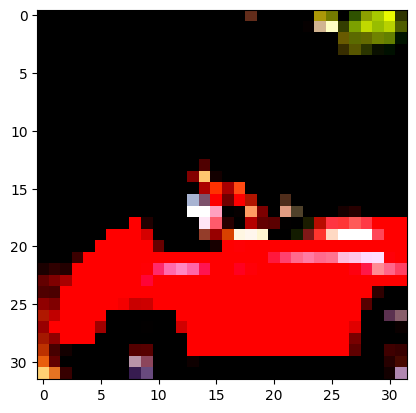

In [ ]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1,2,0))
plt.show()

In [ ]:
model = nn.Sequential(nn.Linear(3072, 512),
                      nn.Tanh(),
                      nn.Linear(512, 10),
                      nn.LogSoftmax(dim=1))

In [ ]:
#count trainable parameter
numel_list = [p.numel()
              for p in model.parameters()
              if p.requires_grad == True]
sum(numel_list)

1578506

In [ ]:
loss = nn.NLLLoss()
img, label = transformed_cifar10[99]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(1.8725, grad_fn=<NllLossBackward0>)

In [ ]:
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
train_loader = torch.utils.data.DataLoader(transformed_cifar10, batch_size = 64, shuffle=True)

loss_fn = nn.NLLLoss()
n_epochs = 100
losses = []
start = datetime.datetime.now()
for epoch in range(n_epochs):
  for imgs, labels in train_loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(imgs.shape[0], -1))
    loss = loss_fn(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
  losses.append(loss.item())

end = datetime.datetime.now()

Epoch: 0, Loss: 1.732845
Epoch: 1, Loss: 1.865945
Epoch: 2, Loss: 1.679139
Epoch: 3, Loss: 1.290401
Epoch: 4, Loss: 1.573167
Epoch: 5, Loss: 1.356667
Epoch: 6, Loss: 1.804811
Epoch: 7, Loss: 1.372169
Epoch: 8, Loss: 1.165958
Epoch: 9, Loss: 1.502864
Epoch: 10, Loss: 1.654413
Epoch: 11, Loss: 1.341853
Epoch: 12, Loss: 1.140347
Epoch: 13, Loss: 1.128313
Epoch: 14, Loss: 1.081319
Epoch: 15, Loss: 0.980154
Epoch: 16, Loss: 1.424446
Epoch: 17, Loss: 1.033053
Epoch: 18, Loss: 1.253779
Epoch: 19, Loss: 0.976884
Epoch: 20, Loss: 0.660316
Epoch: 21, Loss: 0.813217
Epoch: 22, Loss: 1.157951
Epoch: 23, Loss: 0.543601
Epoch: 24, Loss: 0.810469
Epoch: 25, Loss: 0.801550
Epoch: 26, Loss: 0.695213
Epoch: 27, Loss: 1.121485
Epoch: 28, Loss: 1.157566
Epoch: 29, Loss: 0.682740
Epoch: 30, Loss: 0.500533
Epoch: 31, Loss: 0.677581
Epoch: 32, Loss: 0.574244
Epoch: 33, Loss: 0.803256
Epoch: 34, Loss: 0.610855
Epoch: 35, Loss: 0.653257
Epoch: 36, Loss: 1.123149
Epoch: 37, Loss: 0.895441
Epoch: 38, Loss: 1.069

In [ ]:
time = end-start
print('Training time: ', str(time))

Training time:  0:38:00.417061


In [ ]:
#!!!
#save model
torch.save(model.state_dict(), data_path+'p2a_0.01.pt')

#Load model
model.load_state_dict(torch.load(data_path+'p2a_0.01.pt'))

<All keys matched successfully>

Text(0.5, 47.7222222222222, 'Predicted label')

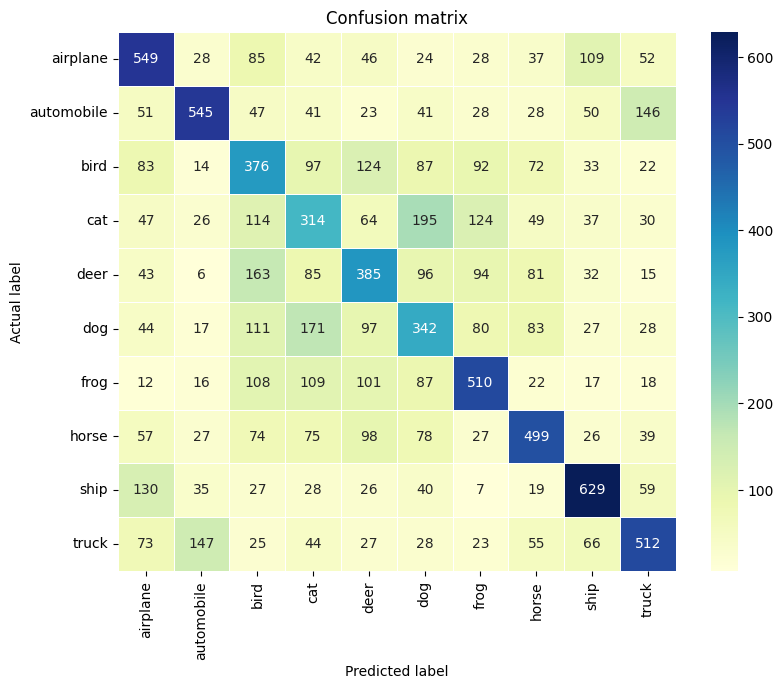

In [ ]:
#Confusion matrix
val_loader = torch.utils.data.DataLoader(transformed_cifar10_val, batch_size=64, shuffle=False)

nb_classes = 10
cnf_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for imgs, labels in val_loader:

        outputs = model(imgs.view(imgs.shape[0], -1))
        _, preds = torch.max(outputs, 1)

        for t, p in zip(labels.view(-1), preds.view(-1)):
                cnf_matrix[t.long(), p.long()] += 1


# create heatmap
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',linewidths=0.5,  xticklabels=class_names, yticklabels=class_names, ax=ax)

plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
cm = pd.DataFrame(cnf_matrix)

recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
f1_score = (2*recall*precision) / (recall+precision)

d = {'class':class_names, 'precision':precision, 'recall':recall, 'f1-score':f1_score}
performance = pd.DataFrame(data = d)
performance

,class,precision,recall,f1-score
0,airplane,0.504132,0.549,0.525610
1,automobile,0.632985,0.545,0.585707
2,bird,0.332743,0.376,0.353052
3,cat,0.312127,0.314,0.313061
4,deer,0.388496,0.385,0.386740
5,dog,0.335953,0.342,0.338949
6,frog,0.503455,0.510,0.506706
7,horse,0.528042,0.499,0.513111
8,ship,0.613060,0.629,0.620928
9,truck,0.555918,0.512,0.533056


In [ ]:
val_loader = torch.utils.data.DataLoader(transformed_cifar10_val, batch_size=64,
  shuffle=False)
correct_val = 0
total_val = 0
val_losses = []
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        val_losses.append(loss.item())
        _, predicted = torch.max(outputs, dim=1)
        total_val += labels.shape[0]
        correct_val += int((predicted == labels).sum())
print("Accuracy Validation: ", correct_val / total_val)

#Training set accuracy
train_loader = torch.utils.data.DataLoader(transformed_cifar10, batch_size=64, shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy training: " , (correct / total))



Accuracy Validation:  0.4661
Accuracy training:  0.9992


In [ ]:
precision_mean = np.sum(performance['precision']) / 10
recall_mean = np.sum(performance['recall']) / 10
f1_mean = np.sum(performance['f1-score']) / 10

print("Accuracy:   %.4f" % (correct_val / total_val))
print("Precsision: %.4f" % precision_mean)
print("Recall:     %.4f" % recall_mean)
print("F1-score:   %.4f" % f1_mean)

print('\n')
print("Training Accuracy: %.4f" % (correct / total))

Accuracy:   0.4661
Precsision: 0.4707
Recall:     0.4661
F1-score:   0.4677


Training Accuracy: 0.9992


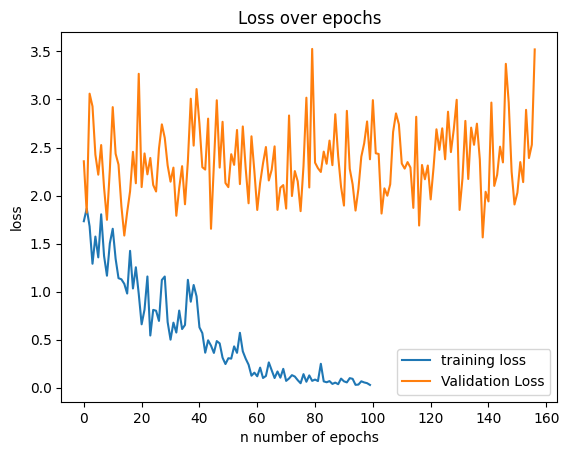

In [ ]:
# 4. Plot the training and validation loss after each iteration
plt.plot(losses, label="training loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("n number of epochs")
plt.ylabel("loss")
plt.legend()
plt.title("Loss over epochs")
plt.show()